# Case Study - World Happiness Analysis Project

## Table of Contents

1. Importing Libraries
2. Import Data - 2018 Data
3. Data Consistency Check - 2018 Data
4. Data Preparation for Regression Analysis
* a. happiness_score_2018 vs economy_gdp_2018
* b. happiness_score_2018 vs social_support_2018
* c. happiness_score_2018 vs health_life_expectancy_2018
* d. happiness_score_2018 vs freedom_2018
* e. happiness_score_2018 vs trust_2018
* f. happiness_score_2018 vs generosity_2018
5. Regression Analysis
* a. happiness_score_2018 vs economy_gdp_2018
* b. happiness_score_2018 vs social_support_2018
* c. happiness_score_2018 vs health_life_expectancy_2018
* d. happiness_score_2018 vs freedom_2018
* e. happiness_score_2018 vs trust_2018
* f. happiness_score_2018 vs generosity_2018

# 01. Importing Libraries

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [133]:
# This option ensures the charts created  are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

# 02a. Importing Data

In [134]:
# Path & list setup
path = r'/Users/ChuahLH/Desktop/Data Science/Data Immersion/Achievement 6/World Happiness Analysis'

In [135]:
# Import 2015.csv dataset into notebook using the os library and the vars_list
df_2018 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', '2018_clean_data.csv'), index_col = False)

In [136]:
df_2018.head()

,Unnamed: 0,happiness_rank_2018,country,happiness_score_2018,economy_gdp_2018,social_support_2018,healthy_life_expectancy_2018,freedom_2018,generosity_2018,trust_2018
0,0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [137]:
# Drop the redundant columns
df_2018 = df_2018.drop(['Unnamed: 0'],axis = 1)

In [138]:
df_2018.shape

(156, 9)

In [139]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   happiness_rank_2018           156 non-null    int64  
 1   country                       156 non-null    object 
 2   happiness_score_2018          156 non-null    float64
 3   economy_gdp_2018              156 non-null    float64
 4   social_support_2018           156 non-null    float64
 5   healthy_life_expectancy_2018  156 non-null    float64
 6   freedom_2018                  156 non-null    float64
 7   generosity_2018               156 non-null    float64
 8   trust_2018                    156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


# 03a. Data Consistency Check - 2018 Data

In [140]:
# check for missing values
df_2018.isnull().sum()

happiness_rank_2018             0
country                         0
happiness_score_2018            0
economy_gdp_2018                0
social_support_2018             0
healthy_life_expectancy_2018    0
freedom_2018                    0
generosity_2018                 0
trust_2018                      0
dtype: int64

In [141]:
# To view missing values
df_nan_2018 = df_2018[df_2018['trust_2018'].isnull()== True]

In [142]:
df_nan_2018

,happiness_rank_2018,country,happiness_score_2018,economy_gdp_2018,social_support_2018,healthy_life_expectancy_2018,freedom_2018,generosity_2018,trust_2018


There is one missing value under trust_2018. Can be neglected. 

In [143]:
# Finding Duplicates
df_dups_2018 = df_2018[df_2018.duplicated()]

In [144]:
df_dups_2018

,happiness_rank_2018,country,happiness_score_2018,economy_gdp_2018,social_support_2018,healthy_life_expectancy_2018,freedom_2018,generosity_2018,trust_2018


Confirmed no duplicated values.

In [145]:
df_2018.describe()

,happiness_rank_2018,happiness_score_2018,economy_gdp_2018,social_support_2018,healthy_life_expectancy_2018,freedom_2018,generosity_2018,trust_2018
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.00000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.11200
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.09618
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.05100
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.08200
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.13650
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.45700


# 04a. Data Preparation for Regression Analysis - 2018 Data

### happiness_score_2018 vs economy_gdp_2018

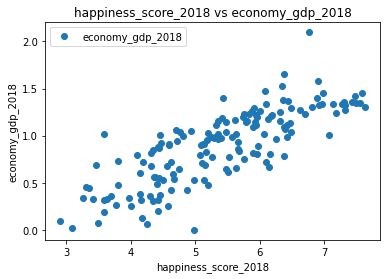

In [146]:
# Create a scatterplot using matplotlib to have another look on how the chosen variables plot against each other

df_2018.plot(x = 'happiness_score_2018', y='economy_gdp_2018',style='o')
plt.title('happiness_score_2018 vs economy_gdp_2018')  
plt.xlabel('happiness_score_2018')  
plt.ylabel('economy_gdp_2018')  
plt.show()

In [147]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_2018['happiness_score_2018'].values.reshape(-1,1)
y = df_2018['economy_gdp_2018'].values.reshape(-1,1)

In [148]:
X

array([[7.632],
       [7.594],
       [7.555],
       [7.495],
       [7.487],
       [7.441],
       [7.328],
       [7.324],
       [7.314],
       [7.272],
       [7.19 ],
       [7.139],
       [7.072],
       [6.977],
       [6.965],
       [6.927],
       [6.91 ],
       [6.886],
       [6.814],
       [6.774],
       [6.711],
       [6.627],
       [6.489],
       [6.488],
       [6.476],
       [6.441],
       [6.43 ],
       [6.419],
       [6.388],
       [6.382],
       [6.379],
       [6.374],
       [6.371],
       [6.343],
       [6.322],
       [6.31 ],
       [6.26 ],
       [6.192],
       [6.173],
       [6.167],
       [6.141],
       [6.123],
       [6.105],
       [6.096],
       [6.083],
       [6.072],
       [6.   ],
       [5.973],
       [5.956],
       [5.952],
       [5.948],
       [5.945],
       [5.933],
       [5.915],
       [5.891],
       [5.89 ],
       [5.875],
       [5.835],
       [5.81 ],
       [5.79 ],
       [5.762],
       [5.752],
       [

In [149]:
y

array([[1.305],
       [1.456],
       [1.351],
       [1.343],
       [1.42 ],
       [1.361],
       [1.33 ],
       [1.268],
       [1.355],
       [1.34 ],
       [1.244],
       [1.341],
       [1.01 ],
       [1.448],
       [1.34 ],
       [1.324],
       [1.576],
       [1.398],
       [1.301],
       [2.096],
       [1.233],
       [1.27 ],
       [1.293],
       [1.038],
       [1.131],
       [1.365],
       [1.112],
       [0.986],
       [1.073],
       [0.781],
       [1.093],
       [1.649],
       [1.379],
       [1.529],
       [1.161],
       [1.251],
       [0.96 ],
       [1.223],
       [1.21 ],
       [0.806],
       [0.668],
       [1.176],
       [1.338],
       [0.719],
       [1.474],
       [1.016],
       [1.264],
       [0.889],
       [0.807],
       [1.197],
       [1.219],
       [1.116],
       [1.148],
       [1.294],
       [1.09 ],
       [0.819],
       [1.266],
       [1.229],
       [1.151],
       [1.143],
       [1.229],
       [0.751],
       [

In [150]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

# 05a. Regression Analysis - 2018 Data

### happiness_score_2018 vs economy_gdp_2018

In [151]:
# create a regression object

regression = LinearRegression()

In [152]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [153]:
# predict the values of y using X

y_predicted = regression.predict(X_test)

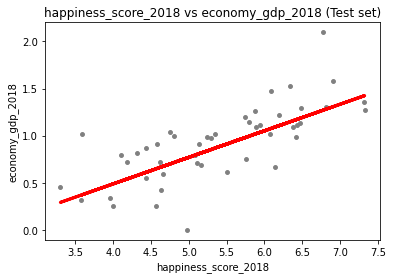

In [154]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('happiness_score_2018 vs economy_gdp_2018 (Test set)')
plot_test.xlabel('happiness_score_2018')
plot_test.ylabel('economy_gdp_2018')
plot_test.show()

In [155]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [156]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.2815989]]
Mean squared error:  0.07515208775519909
R2 score:  0.5086439455013352


The plot (test model) shows a positive relationship, so the coefficient is positive (0.281). The slope means that as happiness_score_2018 rises, as well as the economy_gdp_2018 rises too. In this case, the MSE shows 0.075, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of econogmy_gdp_2018 to happiness_score_2018. The R2 is 50.9 percent, which the data isn't fit that great. 

In [157]:
y_predicted

array([[1.17332956],
       [1.02154775],
       [1.10630902],
       [0.6498372 ],
       [1.18628311],
       [1.42507897],
       [1.07251715],
       [0.67405471],
       [0.51804892],
       [1.09194748],
       [0.81429096],
       [1.03675409],
       [0.66673314],
       [0.61097655],
       [1.01704217],
       [0.37133589],
       [1.14883045],
       [0.61322934],
       [1.07561474],
       [0.57943748],
       [0.37358868],
       [1.42226299],
       [0.47890667],
       [0.99310626],
       [0.65406119],
       [0.2927698 ],
       [0.83991646],
       [0.97874472],
       [0.85371481],
       [0.79964782],
       [1.30849703],
       [1.27019958],
       [0.54254802],
       [0.76557435],
       [1.18994389],
       [0.86835795],
       [0.71601294],
       [0.7024962 ],
       [0.80696939],
       [1.17023197],
       [0.66448034],
       [0.48876263],
       [0.79373424],
       [1.28146354],
       [0.9824055 ],
       [1.15896801],
       [0.91256898]])

In [158]:
# create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1.112,1.173330
1,1.090,1.021548
2,1.223,1.106309
3,0.256,0.649837
4,1.131,1.186283
5,1.268,1.425079
6,1.016,1.072517
7,0.592,0.674055
8,0.793,0.518049
9,0.668,1.091947


In [159]:
# predict

y_predicted_train = regression.predict(X_train) 

In [160]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [161]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.2815989]]
Mean squared error:  0.04580556625525977
R2 score:  0.6981755718451039


The plot (train model) shows a positive relationship, so the coefficient is positive (0.281). The slope means that as happiness_score_2018 rises, as well as the economy_gdp_2018 rises too. In this case, the MSE shows 0.046, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of econogmy_gdp_2018 to happiness_score_2018. The R2 is 69.8 percent, which the data isn't fit that great.

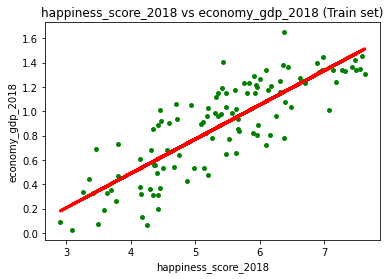

In [162]:
# visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('happiness_score_2018 vs economy_gdp_2018 (Train set)')
plot_test.xlabel('happiness_score_2018')
plot_test.ylabel('economy_gdp_2018')
plot_test.show()

The models outcome on the training set is very similar to that on the test set. With the MSE being even larger on the train set. The R2 is higher in train set compared to test set. 

# 04b. Data Preparation for Regression Analysis - 2018 Data

### happiness_score_2018 vs social_support_2018

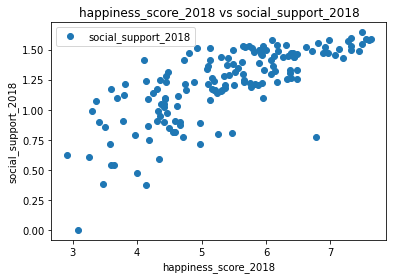

In [163]:
# Create a scatterplot using matplotlib to have another look on how the chosen variables plot against each other

df_2018.plot(x = 'happiness_score_2018', y='social_support_2018',style='o')
plt.title('happiness_score_2018 vs social_support_2018')  
plt.xlabel('happiness_score_2018')  
plt.ylabel('social_support_2018')  
plt.show()

In [164]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_2018['happiness_score_2018'].values.reshape(-1,1)
y = df_2018['social_support_2018'].values.reshape(-1,1)

In [165]:
X

array([[7.632],
       [7.594],
       [7.555],
       [7.495],
       [7.487],
       [7.441],
       [7.328],
       [7.324],
       [7.314],
       [7.272],
       [7.19 ],
       [7.139],
       [7.072],
       [6.977],
       [6.965],
       [6.927],
       [6.91 ],
       [6.886],
       [6.814],
       [6.774],
       [6.711],
       [6.627],
       [6.489],
       [6.488],
       [6.476],
       [6.441],
       [6.43 ],
       [6.419],
       [6.388],
       [6.382],
       [6.379],
       [6.374],
       [6.371],
       [6.343],
       [6.322],
       [6.31 ],
       [6.26 ],
       [6.192],
       [6.173],
       [6.167],
       [6.141],
       [6.123],
       [6.105],
       [6.096],
       [6.083],
       [6.072],
       [6.   ],
       [5.973],
       [5.956],
       [5.952],
       [5.948],
       [5.945],
       [5.933],
       [5.915],
       [5.891],
       [5.89 ],
       [5.875],
       [5.835],
       [5.81 ],
       [5.79 ],
       [5.762],
       [5.752],
       [

In [166]:
y

array([[1.592],
       [1.582],
       [1.59 ],
       [1.644],
       [1.549],
       [1.488],
       [1.532],
       [1.601],
       [1.501],
       [1.573],
       [1.433],
       [1.504],
       [1.459],
       [1.583],
       [1.474],
       [1.483],
       [1.52 ],
       [1.471],
       [1.559],
       [0.776],
       [1.489],
       [1.525],
       [1.466],
       [1.252],
       [1.331],
       [1.436],
       [1.438],
       [1.474],
       [1.468],
       [1.268],
       [1.459],
       [1.303],
       [1.331],
       [1.451],
       [1.258],
       [1.538],
       [1.439],
       [1.492],
       [1.537],
       [1.231],
       [1.319],
       [1.448],
       [1.366],
       [1.584],
       [1.301],
       [1.417],
       [1.501],
       [1.33 ],
       [1.101],
       [1.527],
       [1.506],
       [1.219],
       [1.454],
       [1.462],
       [1.387],
       [1.493],
       [1.204],
       [1.211],
       [1.479],
       [1.516],
       [1.191],
       [1.223],
       [

In [167]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

# 05b. Regression Analysis - 2018 Data

### happiness_score_2018 vs social_support_2018

In [168]:
# create a regression object

regression = LinearRegression()

In [169]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [170]:
# predict the values of y using X

y_predicted = regression.predict(X_test)

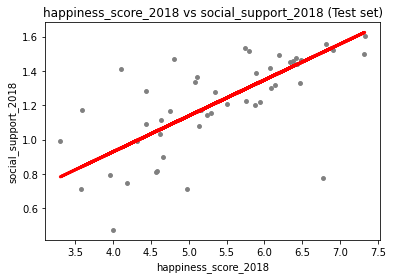

In [171]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('happiness_score_2018 vs social_support_2018 (Test set)')
plot_test.xlabel('happiness_score_2018')
plot_test.ylabel('social_support_2018')
plot_test.show()

In [172]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [173]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.20914807]]
Mean squared error:  0.04294019892907587
R2 score:  0.42499104017834677


The plot (test model) shows a positive relationship, so the coefficient is positive (0.209). The slope means that as happiness_score_2018 rises, as well as the social_support_2018 rises too. In this case, the MSE shows 0.043, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of social_support_2018 to happiness_score_2018. The R2 is 42.5 percent, which the data isn't fit that great.

In [174]:
y_predicted

array([[1.43733042],
       [1.32459961],
       [1.38755318],
       [1.04852415],
       [1.44695123],
       [1.62430879],
       [1.36245541],
       [1.06651089],
       [0.95064286],
       [1.37688663],
       [1.17066663],
       [1.3358936 ],
       [1.06107304],
       [1.01966172],
       [1.32125324],
       [0.84167671],
       [1.41913454],
       [1.02133491],
       [1.36475604],
       [0.99623714],
       [0.8433499 ],
       [1.62221731],
       [0.92157128],
       [1.30347565],
       [1.05166138],
       [0.7833244 ],
       [1.1896991 ],
       [1.2928091 ],
       [1.19994736],
       [1.15979093],
       [1.53772149],
       [1.50927735],
       [0.96883874],
       [1.13448401],
       [1.44967015],
       [1.21082306],
       [1.09767395],
       [1.08763484],
       [1.16522878],
       [1.43502979],
       [1.05939985],
       [0.92889146],
       [1.15539882],
       [1.51764328],
       [1.29552803],
       [1.42666387],
       [1.2436593 ]])

In [175]:
# create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1.438,1.437330
1,1.387,1.324600
2,1.492,1.387553
3,0.813,1.048524
4,1.331,1.446951
5,1.601,1.624309
6,1.417,1.362455
7,0.896,1.066511
8,1.413,0.950643
9,1.319,1.376887


In [176]:
# predict

y_predicted_train = regression.predict(X_train) 

In [177]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [178]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.20914807]]
Mean squared error:  0.03931505007479467
R2 score:  0.5978562773732228


The plot (train model) shows a positive relationship, so the coefficient is positive (0.209). The slope means that as happiness_score_2018 rises, as well as the social_support_2018 rises too. In this case, the MSE shows 0.039, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of social_support_2018 to happiness_score_2018. The R2 is 59.8 percent, which the data isn't fit that great.

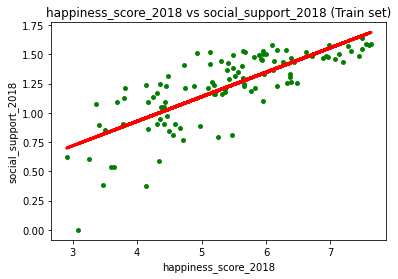

In [179]:
# visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('happiness_score_2018 vs social_support_2018 (Train set)')
plot_test.xlabel('happiness_score_2018')
plot_test.ylabel('social_support_2018')
plot_test.show()

The models outcome on the training set is very similar to that on the test set. With the MSE larger on the test set; The R2 is higher in train set compared to test set. 

# 04c. Data Preparation for Regression Analysis - 2018 Data

### happiness_score_2018 vs health_life_expectancy_2018

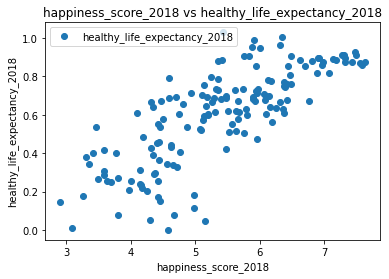

In [180]:
# Create a scatterplot using matplotlib to have another look on how the chosen variables plot against each other

df_2018.plot(x ='happiness_score_2018', y='healthy_life_expectancy_2018',style='o')
plt.title('happiness_score_2018 vs healthy_life_expectancy_2018')  
plt.xlabel('happiness_score_2018')  
plt.ylabel('healthy_life_expectancy_2018')  
plt.show()

In [181]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_2018['happiness_score_2018'].values.reshape(-1,1)
y = df_2018['healthy_life_expectancy_2018'].values.reshape(-1,1)

In [182]:
X

array([[7.632],
       [7.594],
       [7.555],
       [7.495],
       [7.487],
       [7.441],
       [7.328],
       [7.324],
       [7.314],
       [7.272],
       [7.19 ],
       [7.139],
       [7.072],
       [6.977],
       [6.965],
       [6.927],
       [6.91 ],
       [6.886],
       [6.814],
       [6.774],
       [6.711],
       [6.627],
       [6.489],
       [6.488],
       [6.476],
       [6.441],
       [6.43 ],
       [6.419],
       [6.388],
       [6.382],
       [6.379],
       [6.374],
       [6.371],
       [6.343],
       [6.322],
       [6.31 ],
       [6.26 ],
       [6.192],
       [6.173],
       [6.167],
       [6.141],
       [6.123],
       [6.105],
       [6.096],
       [6.083],
       [6.072],
       [6.   ],
       [5.973],
       [5.956],
       [5.952],
       [5.948],
       [5.945],
       [5.933],
       [5.915],
       [5.891],
       [5.89 ],
       [5.875],
       [5.835],
       [5.81 ],
       [5.79 ],
       [5.762],
       [5.752],
       [

In [183]:
y

array([[0.874],
       [0.861],
       [0.868],
       [0.914],
       [0.927],
       [0.878],
       [0.896],
       [0.876],
       [0.913],
       [0.91 ],
       [0.888],
       [0.891],
       [0.817],
       [0.876],
       [0.861],
       [0.894],
       [0.896],
       [0.819],
       [0.883],
       [0.67 ],
       [0.854],
       [0.884],
       [0.908],
       [0.761],
       [0.808],
       [0.857],
       [0.759],
       [0.675],
       [0.744],
       [0.608],
       [0.771],
       [0.748],
       [0.633],
       [1.008],
       [0.669],
       [0.965],
       [0.635],
       [0.564],
       [0.776],
       [0.639],
       [0.7  ],
       [0.781],
       [0.698],
       [0.605],
       [0.675],
       [0.707],
       [0.946],
       [0.736],
       [0.474],
       [0.716],
       [0.856],
       [0.726],
       [0.671],
       [0.988],
       [0.684],
       [0.693],
       [0.955],
       [0.909],
       [0.599],
       [0.631],
       [0.909],
       [0.508],
       [

In [184]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

# 05c. Regression Analysis - 2018 Data

### happiness_score_2018 vs health_life_expectancy_2018

In [185]:
# create a regression object

regression = LinearRegression()

In [186]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [187]:
# predict the values of y using X

y_predicted = regression.predict(X_test)

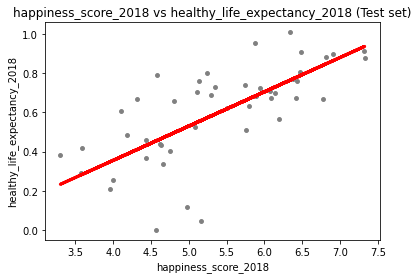

In [188]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('happiness_score_2018 vs healthy_life_expectancy_2018 (Test set)')
plot_test.xlabel('happiness_score_2018')
plot_test.ylabel('healthy_life_expectancy_2018')
plot_test.show()

In [189]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [190]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.17497693]]
Mean squared error:  0.029989511244027243
R2 score:  0.4711528087379908


The plot (test model) shows a positive relationship, so the coefficient is positive (0.175). The slope means that as happiness_score_2018 rises, as well as the health_life_expectancy_2018 rises too. In this case, the MSE shows 0.03, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of health_life_expectancy_2018 to happiness_score_2018. The R2 is 47.1 percent, which the data isn't fit that great.

In [191]:
y_predicted

array([[0.78012708],
       [0.68581452],
       [0.73848257],
       [0.45484497],
       [0.78817602],
       [0.93655645],
       [0.71748534],
       [0.46989299],
       [0.37295577],
       [0.72955875],
       [0.5570315 ],
       [0.69526327],
       [0.46534359],
       [0.43069816],
       [0.68301489],
       [0.28179279],
       [0.76490409],
       [0.43209797],
       [0.71941009],
       [0.41110074],
       [0.28319261],
       [0.93480669],
       [0.34863398],
       [0.66814185],
       [0.45746963],
       [0.23297423],
       [0.5729544 ],
       [0.65921802],
       [0.58152827],
       [0.5479327 ],
       [0.86411601],
       [0.84031914],
       [0.38817876],
       [0.52676049],
       [0.79045072],
       [0.59062707],
       [0.49596455],
       [0.48756566],
       [0.5524821 ],
       [0.77820233],
       [0.46394377],
       [0.35475817],
       [0.54425818],
       [0.84731822],
       [0.66149272],
       [0.77120326],
       [0.61809845]])

In [192]:
# create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.759,0.780127
1,0.684,0.685815
2,0.564,0.738483
3,0.000,0.454845
4,0.808,0.788176
5,0.876,0.936556
6,0.707,0.717485
7,0.337,0.469893
8,0.609,0.372956
9,0.700,0.729559


In [193]:
# predict

y_predicted_train = regression.predict(X_train) 

In [194]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [195]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.17497693]]
Mean squared error:  0.021794087096467706
R2 score:  0.6524288847956274


The plot (train model) shows a positive relationship, so the coefficient is positive (0.175). The slope means that as happiness_score_2018 rises, as well as the health_life_expectancy_2018 rises too. In this case, the MSE shows 0.022, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of health_life_expectancy_2018 to happiness_score_2018. The R2 is 65.2 percent, which the data isn't fit that great.

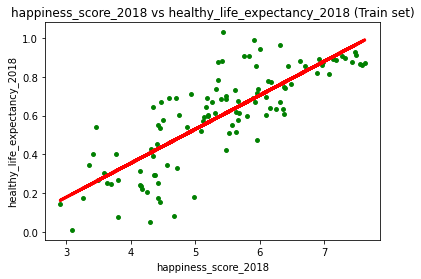

In [196]:
# visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('happiness_score_2018 vs healthy_life_expectancy_2018 (Train set)')
plot_test.xlabel('happiness_score_2018')
plot_test.ylabel('healthy_life_expectancy_2018')
plot_test.show()

The models outcome on the training set is very similar to that on the test set. With the MSE larger on the test set; The R2 is higher in train set compared to test set.

# 04d. Data Preparation for Regression Analysis - 2018 Data

### happiness_score_2018 vs freedom_2018

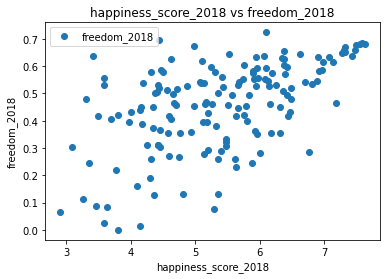

In [197]:
# Create a scatterplot using matplotlib to have another look on how the chosen variables plot against each other

df_2018.plot(x = 'happiness_score_2018', y='freedom_2018',style='o')
plt.title('happiness_score_2018 vs freedom_2018')  
plt.xlabel('happiness_score_2018')  
plt.ylabel('freedom_2018')  
plt.show()

In [198]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_2018['happiness_score_2018'].values.reshape(-1,1)
y = df_2018['freedom_2018'].values.reshape(-1,1)

In [199]:
X

array([[7.632],
       [7.594],
       [7.555],
       [7.495],
       [7.487],
       [7.441],
       [7.328],
       [7.324],
       [7.314],
       [7.272],
       [7.19 ],
       [7.139],
       [7.072],
       [6.977],
       [6.965],
       [6.927],
       [6.91 ],
       [6.886],
       [6.814],
       [6.774],
       [6.711],
       [6.627],
       [6.489],
       [6.488],
       [6.476],
       [6.441],
       [6.43 ],
       [6.419],
       [6.388],
       [6.382],
       [6.379],
       [6.374],
       [6.371],
       [6.343],
       [6.322],
       [6.31 ],
       [6.26 ],
       [6.192],
       [6.173],
       [6.167],
       [6.141],
       [6.123],
       [6.105],
       [6.096],
       [6.083],
       [6.072],
       [6.   ],
       [5.973],
       [5.956],
       [5.952],
       [5.948],
       [5.945],
       [5.933],
       [5.915],
       [5.891],
       [5.89 ],
       [5.875],
       [5.835],
       [5.81 ],
       [5.79 ],
       [5.762],
       [5.752],
       [

In [200]:
y

array([[0.681],
       [0.686],
       [0.683],
       [0.677],
       [0.66 ],
       [0.638],
       [0.653],
       [0.669],
       [0.659],
       [0.647],
       [0.464],
       [0.617],
       [0.632],
       [0.614],
       [0.586],
       [0.583],
       [0.632],
       [0.547],
       [0.533],
       [0.284],
       [0.543],
       [0.645],
       [0.52 ],
       [0.479],
       [0.431],
       [0.418],
       [0.597],
       [0.493],
       [0.57 ],
       [0.604],
       [0.625],
       [0.654],
       [0.509],
       [0.631],
       [0.356],
       [0.449],
       [0.531],
       [0.575],
       [0.354],
       [0.461],
       [0.527],
       [0.546],
       [0.594],
       [0.724],
       [0.554],
       [0.637],
       [0.281],
       [0.556],
       [0.593],
       [0.35 ],
       [0.633],
       [0.528],
       [0.363],
       [0.553],
       [0.584],
       [0.575],
       [0.244],
       [0.495],
       [0.399],
       [0.454],
       [0.423],
       [0.606],
       [

In [201]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

# 05d. Regression Analysis - 2018 Data

### happiness_score_2018 vs freedom_2018

In [202]:
# create a regression object

regression = LinearRegression()

In [203]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [204]:
# predict the values of y using X

y_predicted = regression.predict(X_test)

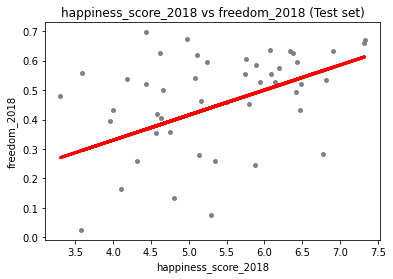

In [205]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('happiness_score_2018 vs freedom_2018 (Test set)')
plot_test.xlabel('happiness_score_2018')
plot_test.ylabel('freedom_2018')
plot_test.show()

In [206]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [207]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.08506437]]
Mean squared error:  0.02408423459645098
R2 score:  0.09726039011830168


The plot (test model) shows a positive relationship, so the coefficient is positive (0.085). The slope means that as happiness_score_2018 rises, as well as the freedom_2018 rises too. In this case, the MSE shows 0.024, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of freedom_2018 to happiness_score_2018. The R2 is 9.72 percent, which the data isn't fit that great.

In [208]:
y_predicted

array([[0.53671274],
       [0.49086304],
       [0.51646742],
       [0.37857807],
       [0.5406257 ],
       [0.61276028],
       [0.50625969],
       [0.38589361],
       [0.33876795],
       [0.51212913],
       [0.42825567],
       [0.49545652],
       [0.38368194],
       [0.36683919],
       [0.48950201],
       [0.29444941],
       [0.52931214],
       [0.36751971],
       [0.5071954 ],
       [0.35731198],
       [0.29512993],
       [0.61190964],
       [0.326944  ],
       [0.48227154],
       [0.37985404],
       [0.27071646],
       [0.43599652],
       [0.47793326],
       [0.44016468],
       [0.42383232],
       [0.57754363],
       [0.56597488],
       [0.34616855],
       [0.41353953],
       [0.54173153],
       [0.44458802],
       [0.3985682 ],
       [0.39448511],
       [0.42604399],
       [0.53577703],
       [0.38300142],
       [0.32992126],
       [0.42204597],
       [0.56937745],
       [0.47903909],
       [0.53237445],
       [0.45794313]])

In [209]:
# create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.597,0.536713
1,0.584,0.490863
2,0.575,0.516467
3,0.355,0.378578
4,0.431,0.540626
5,0.669,0.612760
6,0.637,0.506260
7,0.499,0.385894
8,0.163,0.338768
9,0.527,0.512129


In [210]:
# predict

y_predicted_train = regression.predict(X_train) 

In [211]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [212]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.08506437]]
Mean squared error:  0.016162600614938197
R2 score:  0.3742984144353989


The plot (train model) shows a positive relationship, so the coefficient is positive (0.085). The slope means that as happiness_score_2018 rises, as well as the freedom_2018 rises too. In this case, the MSE shows 0.016, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of freedom_2018 to happiness_score_2018. The R2 is 37.4 percent, which the data isn't fit that great.

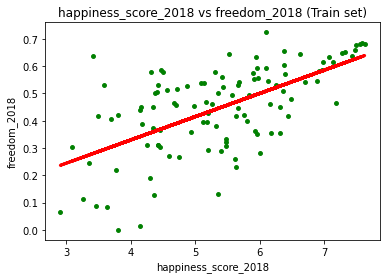

In [213]:
# visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('happiness_score_2018 vs freedom_2018 (Train set)')
plot_test.xlabel('happiness_score_2018')
plot_test.ylabel('freedom_2018')
plot_test.show()

The models outcome on the training set is very similar to that on the test set. With the MSE larger on the test set; The R2 is higher in train set compared to test set.

# 04e. Data Preparation for Regression Analysis - 2018 Data

### happiness_score_2018 vs trust_2018

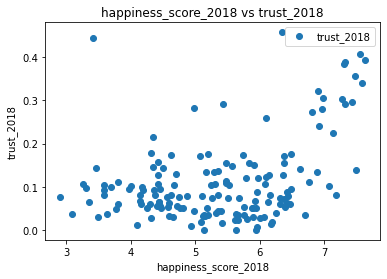

In [214]:
# Create a scatterplot using matplotlib to have another look on how the chosen variables plot against each other

df_2018.plot(x = 'happiness_score_2018', y='trust_2018',style='o')
plt.title('happiness_score_2018 vs trust_2018')  
plt.xlabel('happiness_score_2018')  
plt.ylabel('trust_2018')  
plt.show()

In [215]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_2018['happiness_score_2018'].values.reshape(-1,1)
y = df_2018['trust_2018'].values.reshape(-1,1)

In [216]:
X

array([[7.632],
       [7.594],
       [7.555],
       [7.495],
       [7.487],
       [7.441],
       [7.328],
       [7.324],
       [7.314],
       [7.272],
       [7.19 ],
       [7.139],
       [7.072],
       [6.977],
       [6.965],
       [6.927],
       [6.91 ],
       [6.886],
       [6.814],
       [6.774],
       [6.711],
       [6.627],
       [6.489],
       [6.488],
       [6.476],
       [6.441],
       [6.43 ],
       [6.419],
       [6.388],
       [6.382],
       [6.379],
       [6.374],
       [6.371],
       [6.343],
       [6.322],
       [6.31 ],
       [6.26 ],
       [6.192],
       [6.173],
       [6.167],
       [6.141],
       [6.123],
       [6.105],
       [6.096],
       [6.083],
       [6.072],
       [6.   ],
       [5.973],
       [5.956],
       [5.952],
       [5.948],
       [5.945],
       [5.933],
       [5.915],
       [5.891],
       [5.89 ],
       [5.875],
       [5.835],
       [5.81 ],
       [5.79 ],
       [5.762],
       [5.752],
       [

In [217]:
y

array([[0.393],
       [0.34 ],
       [0.408],
       [0.138],
       [0.357],
       [0.295],
       [0.291],
       [0.389],
       [0.383],
       [0.302],
       [0.082],
       [0.224],
       [0.101],
       [0.306],
       [0.28 ],
       [0.24 ],
       [0.321],
       [0.133],
       [0.272],
       [0.112],
       [0.034],
       [0.142],
       [0.176],
       [0.095],
       [0.061],
       [0.078],
       [0.063],
       [0.088],
       [0.054],
       [0.071],
       [0.155],
       [0.171],
       [0.127],
       [0.457],
       [0.059],
       [0.074],
       [0.039],
       [0.019],
       [0.014],
       [0.082],
       [0.128],
       [0.064],
       [0.123],
       [0.259],
       [0.106],
       [0.029],
       [0.028],
       [0.12 ],
       [0.089],
       [0.006],
       [0.051],
       [0.001],
       [0.066],
       [0.15 ],
       [0.05 ],
       [0.031],
       [0.051],
       [0.154],
       [0.025],
       [0.121],
       [0.035],
       [0.054],
       [

In [218]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

# 05e. Regression Analysis - 2018 Data

### happiness_score_2018 vs trust_2018¶

In [219]:
# create a regression object

regression = LinearRegression()

In [220]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [221]:
# predict the values of y using X

y_predicted = regression.predict(X_test)

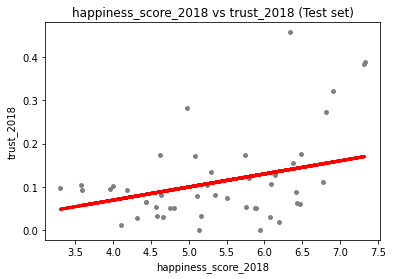

In [222]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('happiness_score_2018 vs trust_2018 (Test set)')
plot_test.xlabel('happiness_score_2018')
plot_test.ylabel('trust_2018')
plot_test.show()

In [223]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [224]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03029735]]
Mean squared error:  0.008616977524980859
R2 score:  0.19012431888055437


The plot (test model) shows a positive relationship, so the coefficient is positive (0.03). The slope means that as happiness_score_2018 rises, as well as the trust_2018 rises too. In this case, the MSE shows 0.009, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of trust_2018 to happiness_score_2018. The R2 is 19 percent, which the data fit very poor.

In [225]:
y_predicted

array([[0.14274798],
       [0.12641771],
       [0.13553721],
       [0.08642521],
       [0.14414166],
       [0.16983381],
       [0.13190153],
       [0.08903078],
       [0.07224605],
       [0.13399205],
       [0.10411886],
       [0.12805377],
       [0.08824305],
       [0.08224417],
       [0.12593295],
       [0.05646113],
       [0.14011211],
       [0.08248655],
       [0.1322348 ],
       [0.07885087],
       [0.0567035 ],
       [0.16953084],
       [0.06803471],
       [0.12335768],
       [0.08687967],
       [0.04800817],
       [0.10687592],
       [0.12181251],
       [0.10836049],
       [0.1025434 ],
       [0.15729071],
       [0.15317027],
       [0.07488192],
       [0.09887742],
       [0.14453552],
       [0.10993595],
       [0.09354508],
       [0.09209081],
       [0.10333113],
       [0.14241471],
       [0.08800067],
       [0.06909512],
       [0.10190715],
       [0.15438216],
       [0.12220638],
       [0.14120282],
       [0.11469263]])

In [226]:
# create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.063,0.142748
1,0.050,0.126418
2,0.019,0.135537
3,0.053,0.086425
4,0.061,0.144142
5,0.389,0.169834
6,0.029,0.131902
7,0.029,0.089031
8,0.011,0.072246
9,0.128,0.133992


In [227]:
# predict

y_predicted_train = regression.predict(X_train) 

In [228]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [229]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03029735]]
Mean squared error:  0.00733571810122353
R2 score:  0.1432479563035839


The plot (train model) shows a positive relationship, so the coefficient is positive (0.03). The slope means that as happiness_score_2018 rises, as well as the trust_2018 rises too. In this case, the MSE shows 0.007, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of trust_2018 to happiness_score_2018. The R2 is 14.3 percent, which the data fit very poor.

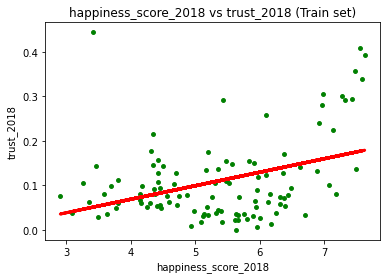

In [230]:
# visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('happiness_score_2018 vs trust_2018 (Train set)')
plot_test.xlabel('happiness_score_2018')
plot_test.ylabel('trust_2018')
plot_test.show()

The models outcome on the training set is very similar to that on the test set. With the MSE larger on the test set; The R2 is higher in train set compared to test set.

# 04f. Data Preparation for Regression Analysis - 2018 Data


### happiness_score_2018 vs generosity_2018

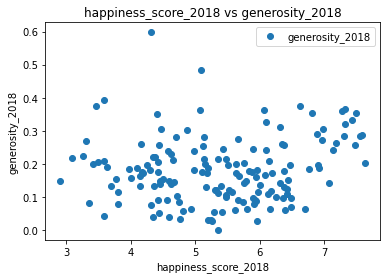

In [232]:
# Create a scatterplot using matplotlib to have another look on how the chosen variables plot against each other

df_2018.plot(x = 'happiness_score_2018', y='generosity_2018',style='o')
plt.title('happiness_score_2018 vs generosity_2018')  
plt.xlabel('happiness_score_2018')  
plt.ylabel('generosity_2018')  
plt.show()

In [233]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_2018['happiness_score_2018'].values.reshape(-1,1)
y = df_2018['generosity_2018'].values.reshape(-1,1)

In [234]:
X

array([[7.632],
       [7.594],
       [7.555],
       [7.495],
       [7.487],
       [7.441],
       [7.328],
       [7.324],
       [7.314],
       [7.272],
       [7.19 ],
       [7.139],
       [7.072],
       [6.977],
       [6.965],
       [6.927],
       [6.91 ],
       [6.886],
       [6.814],
       [6.774],
       [6.711],
       [6.627],
       [6.489],
       [6.488],
       [6.476],
       [6.441],
       [6.43 ],
       [6.419],
       [6.388],
       [6.382],
       [6.379],
       [6.374],
       [6.371],
       [6.343],
       [6.322],
       [6.31 ],
       [6.26 ],
       [6.192],
       [6.173],
       [6.167],
       [6.141],
       [6.123],
       [6.105],
       [6.096],
       [6.083],
       [6.072],
       [6.   ],
       [5.973],
       [5.956],
       [5.952],
       [5.948],
       [5.945],
       [5.933],
       [5.915],
       [5.891],
       [5.89 ],
       [5.875],
       [5.835],
       [5.81 ],
       [5.79 ],
       [5.762],
       [5.752],
       [

In [235]:
y

array([[0.202],
       [0.286],
       [0.284],
       [0.353],
       [0.256],
       [0.333],
       [0.321],
       [0.365],
       [0.285],
       [0.361],
       [0.262],
       [0.242],
       [0.143],
       [0.307],
       [0.273],
       [0.188],
       [0.196],
       [0.291],
       [0.354],
       [0.186],
       [0.064],
       [0.376],
       [0.098],
       [0.069],
       [0.197],
       [0.151],
       [0.125],
       [0.11 ],
       [0.062],
       [0.179],
       [0.13 ],
       [0.256],
       [0.098],
       [0.261],
       [0.311],
       [0.142],
       [0.099],
       [0.171],
       [0.118],
       [0.065],
       [0.208],
       [0.108],
       [0.243],
       [0.328],
       [0.167],
       [0.364],
       [0.137],
       [0.114],
       [0.183],
       [0.026],
       [0.16 ],
       [0.088],
       [0.092],
       [0.079],
       [0.245],
       [0.096],
       [0.175],
       [0.179],
       [0.065],
       [0.148],
       [0.202],
       [0.141],
       [

In [236]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

# 05f. Regression Analysis - 2018 Data

### happiness_score_2018 vs generosity_2018

In [237]:
# create a regression object

regression = LinearRegression()

In [238]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [239]:
# predict the values of y using X

y_predicted = regression.predict(X_test)

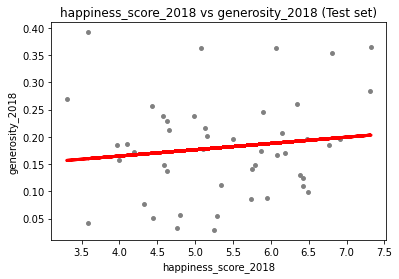

In [240]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('happiness_score_2018 vs generosity_2018 (Test set)')
plot_test.xlabel('happiness_score_2018')
plot_test.ylabel('generosity_2018')
plot_test.show()

In [241]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [242]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0115604]]
Mean squared error:  0.008203312399943647
R2 score:  0.020834879630335146


The plot (test model) shows a positive relationship, so the coefficient is positive (0.0116). The slope means that as happiness_score_2018 rises, as well as the generosity_2018 rises too. In this case, the MSE shows 0.008, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of generosity_2018 to happiness_score_2018. The R2 is 2 percent, which the data fit very poor.

In [243]:
y_predicted

array([[0.19294406],
       [0.18671301],
       [0.19019269],
       [0.17145328],
       [0.19347584],
       [0.20327907],
       [0.18880544],
       [0.17244747],
       [0.16604301],
       [0.18960311],
       [0.17820455],
       [0.18733727],
       [0.1721469 ],
       [0.16985794],
       [0.18652804],
       [0.16002004],
       [0.19193831],
       [0.16995042],
       [0.1889326 ],
       [0.16856317],
       [0.16011252],
       [0.20316346],
       [0.16443611],
       [0.18554541],
       [0.17162668],
       [0.15679468],
       [0.17925655],
       [0.18495583],
       [0.17982301],
       [0.17760341],
       [0.19849306],
       [0.19692084],
       [0.16704876],
       [0.1762046 ],
       [0.19362613],
       [0.18042415],
       [0.17416997],
       [0.17361507],
       [0.17790398],
       [0.1928169 ],
       [0.17205442],
       [0.16484073],
       [0.17736064],
       [0.19738326],
       [0.18510611],
       [0.19235448],
       [0.18223913]])

In [244]:
# create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.125,0.192944
1,0.245,0.186713
2,0.171,0.190193
3,0.238,0.171453
4,0.197,0.193476
5,0.365,0.203279
6,0.364,0.188805
7,0.212,0.172447
8,0.187,0.166043
9,0.208,0.189603


In [245]:
# predict

y_predicted_train = regression.predict(X_train) 

In [246]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [247]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0115604]]
Mean squared error:  0.009997311505489537
R2 score:  0.01754851802635904


The plot (train model) shows a positive relationship, so the coefficient is positive (0.0116). The slope means that as happiness_score_2018 rises, as well as the generosity_2018 rises too. In this case, the MSE shows 0.01, it is safe to say the regression may be the good model to represent this data and can accurately predict the influence of generosity_2018 to happiness_score_2018. The R2 is 1.8 percent, which the data fit very poor.

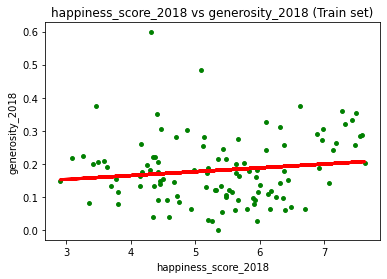

In [248]:
# visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('happiness_score_2018 vs generosity_2018 (Train set)')
plot_test.xlabel('happiness_score_2018')
plot_test.ylabel('generosity_2018')
plot_test.show()

The models outcome on the training set is very similar to that on the test set. With the MSE larger on the train set; The R2 is higher in test set compared to train set.